In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleyelim
file_path = "C:/Users/Mutlu/OneDrive/Desktop/vgchartz-2024.csv"
data = pd.read_csv(file_path)
data.info

<bound method DataFrame.info of                                                  img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Au

In [2]:
data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
# Her sütundaki eksik veri sayısını kontrol etmek için
missing_values = data.isnull().sum()
print(missing_values)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [4]:
# Bu sütunlar milyon kopya satışlarını gösteriyor.
# Eksik veri = muhtemelen hiç satış olmamış bölge anlamına gelebilir.
#En güvenli yaklaşım: 0 ile doldurmak. Bu, toplam satışları bozmadan ilerlememizi sağlar.

data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].fillna(0)


In [5]:
# Eksik veri sayısı sadece 3 satır olduğu için bunları düşürmek daha mantıklı.
data = data.dropna(subset=['release_date'])


In [6]:
data = data.drop(columns=['last_update'])

In [7]:
data = data.drop(columns=['img'])

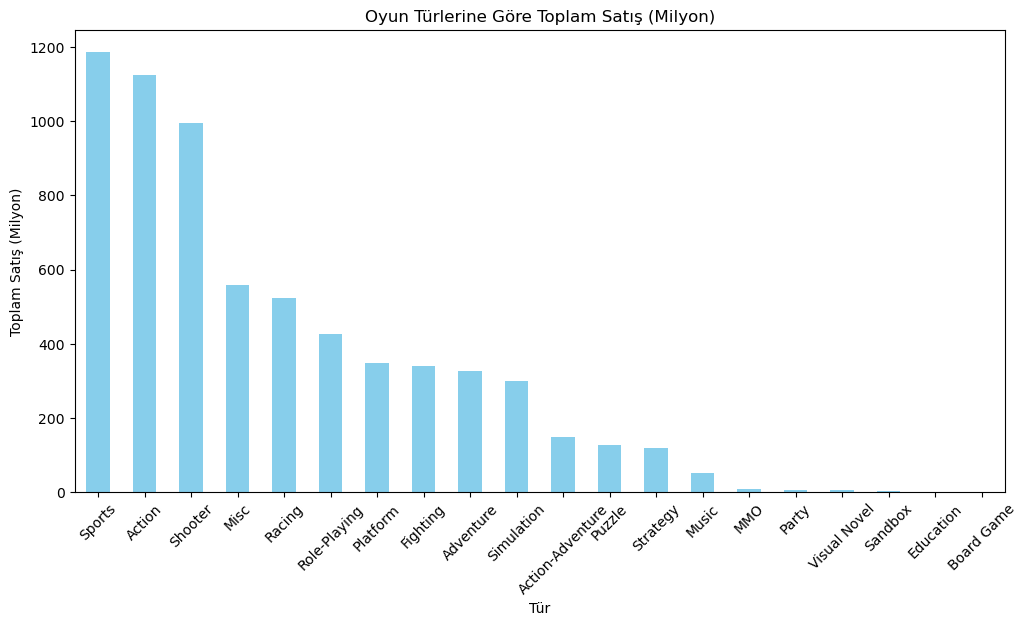

In [8]:
# 1. Türlere Göre Satış Analizi
sales_by_genre = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_genre.plot(kind='bar', color='skyblue')
plt.title('Oyun Türlerine Göre Toplam Satış (Milyon)')
plt.xlabel('Tür')
plt.ylabel('Toplam Satış (Milyon)')
plt.xticks(rotation=45)
plt.show()

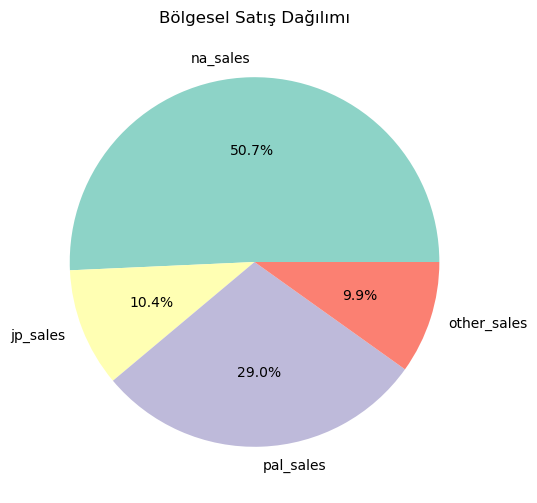

In [9]:
# 2. Bölgesel Satış Dağılımı
regional_sales = data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

plt.figure(figsize=(8, 6))
regional_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Bölgesel Satış Dağılımı')
plt.ylabel('')
plt.show()

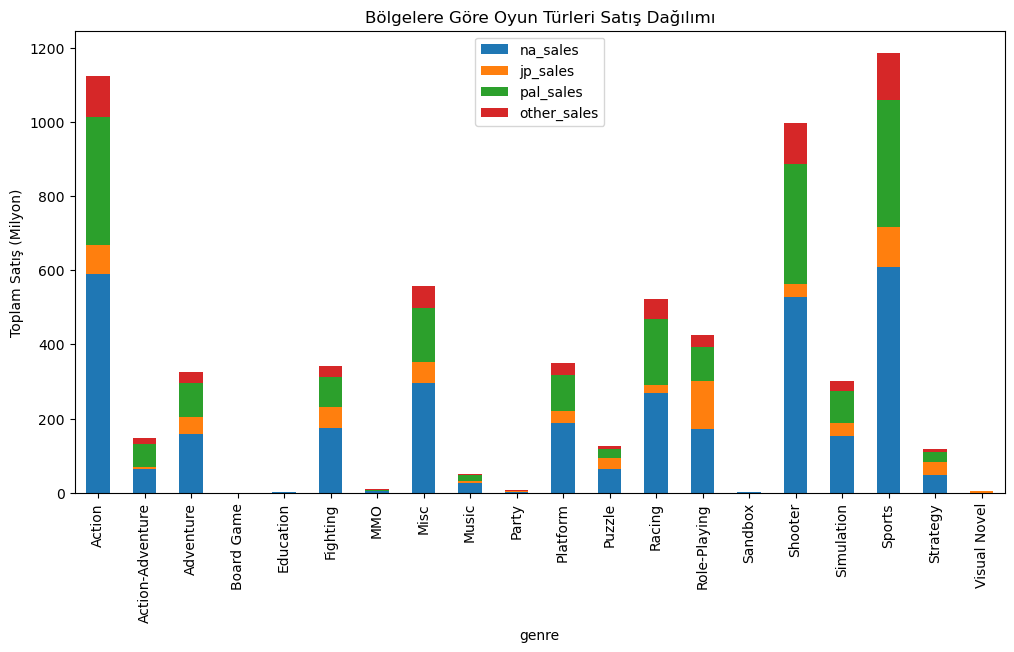

In [10]:

# Her bölgedeki satışları oyun türüne göre topla
genre_sales_by_region = data.groupby("genre")[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Çubuk grafiği çiz
genre_sales_by_region.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title("Bölgelere Göre Oyun Türleri Satış Dağılımı")
plt.ylabel("Toplam Satış (Milyon)")
plt.show()


In [11]:
# Eleştirmen puanı ve satışlar arasındaki korelasyon
correlation = data[['critic_score', 'total_sales']].corr()
print(correlation)

              critic_score  total_sales
critic_score      1.000000     0.281253
total_sales       0.281253     1.000000


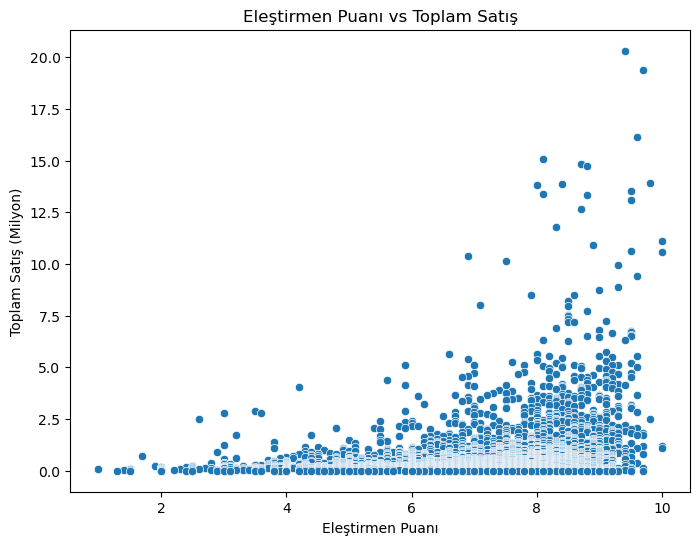

In [12]:
# 3. Puan-Satış İlişkisi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=data)
plt.title('Eleştirmen Puanı vs Toplam Satış')
plt.xlabel('Eleştirmen Puanı')
plt.ylabel('Toplam Satış (Milyon)')
plt.show()

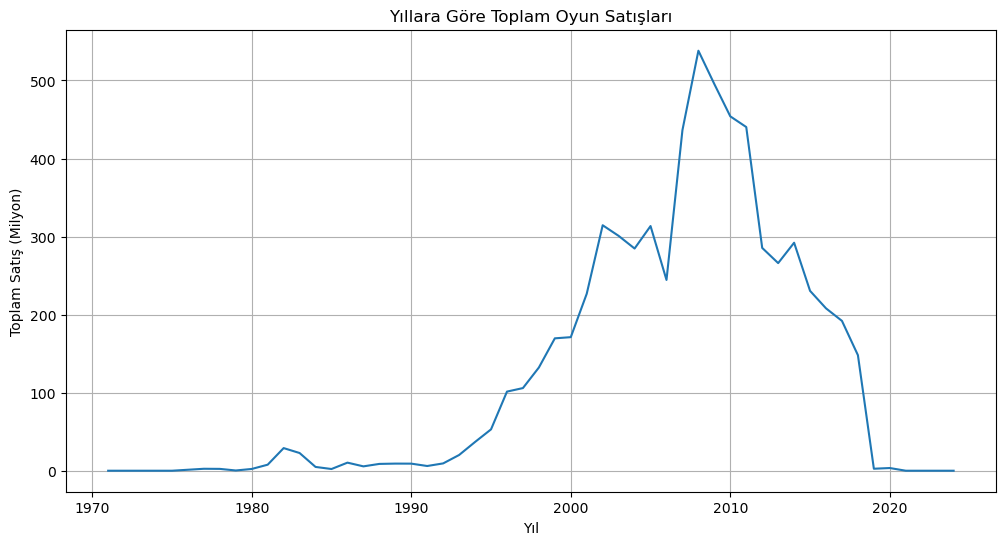

In [13]:
# 4. Zaman Serisi Analizi
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['release_year'] = data['release_date'].dt.year

yearly_sales = data.groupby('release_year')['total_sales'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot()
plt.title('Yıllara Göre Toplam Oyun Satışları')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış (Milyon)')
plt.grid()
plt.show()

In [14]:
# 5. En İyi Yayıncı ve Geliştirici

top_publishers = data.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

top_developers = data.groupby('developer')['total_sales'].sum().sort_values(ascending=False).head(10)

print("En Çok Satan Yayıncılar (Top 10):")
print(top_publishers)

print("\nEn Çok Satan Geliştiriciler (Top 10):")
print(top_developers)

En Çok Satan Yayıncılar (Top 10):
publisher
Activision                     722.77
Electronic Arts                644.13
EA Sports                      485.66
Ubisoft                        462.57
THQ                            320.89
Sony Computer Entertainment    311.08
Rockstar Games                 239.67
Konami                         210.70
Sega                           206.38
Nintendo                       140.80
Name: total_sales, dtype: float64

En Çok Satan Geliştiriciler (Top 10):
developer
EA Canada            275.56
EA Tiburon           178.33
Ubisoft Montreal     172.96
Treyarch             150.19
Traveller's Tales    149.55
Infinity Ward        118.97
Rockstar North       116.91
Konami               109.42
Visual Concepts       97.61
Capcom                92.95
Name: total_sales, dtype: float64


C:\Users\Mutlu\AppData\Local\Temp\ipykernel_12864\78192106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="Blues_r")


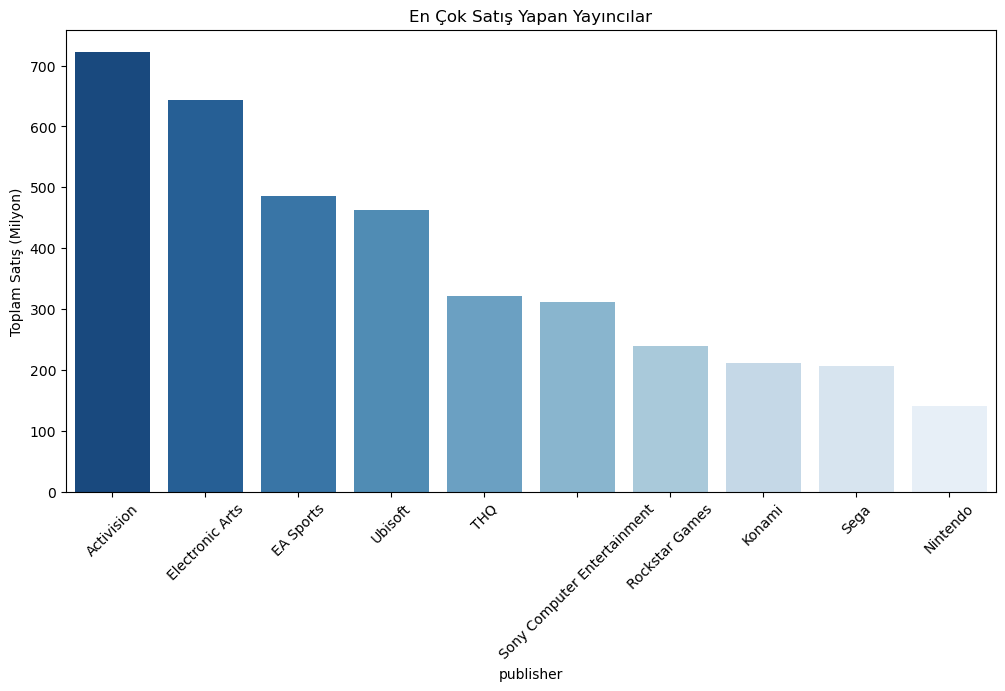

In [15]:
# Yayıncı bazında toplam satışları hesapla
top_publishers = data.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)

# Çubuk grafiği çiz
plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("En Çok Satış Yapan Yayıncılar")
plt.ylabel("Toplam Satış (Milyon)")
plt.show()


C:\Users\Mutlu\AppData\Local\Temp\ipykernel_12864\3049888378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.index, y=top_developers.values, palette="Reds_r")


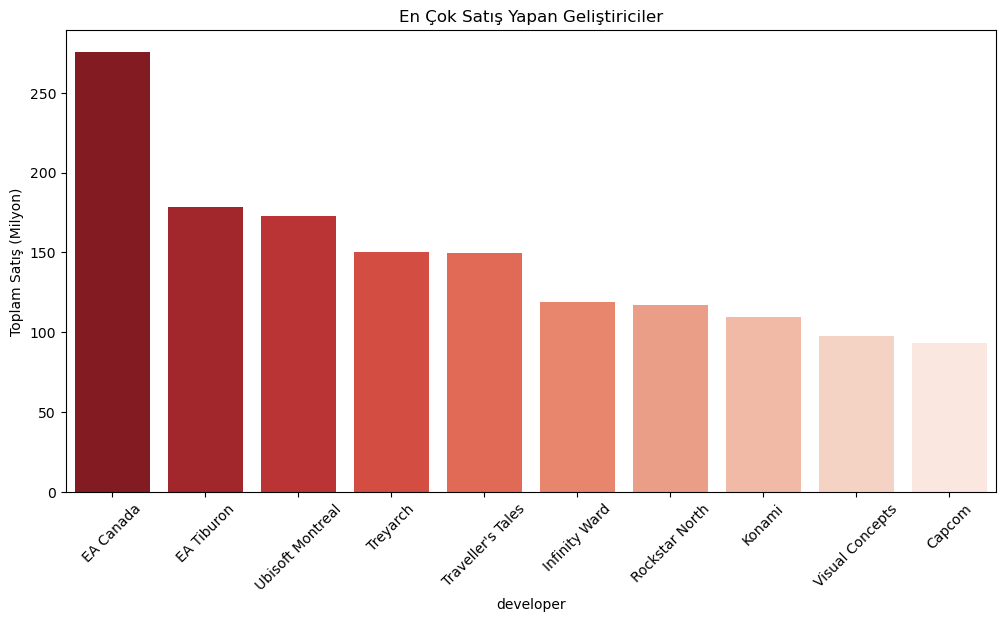

In [16]:
# Geliştirici bazında toplam satışları hesapla
top_developers = data.groupby("developer")["total_sales"].sum().sort_values(ascending=False).head(10)

# Çubuk grafiği çiz
plt.figure(figsize=(12,6))
sns.barplot(x=top_developers.index, y=top_developers.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("En Çok Satış Yapan Geliştiriciler")
plt.ylabel("Toplam Satış (Milyon)")
plt.show()


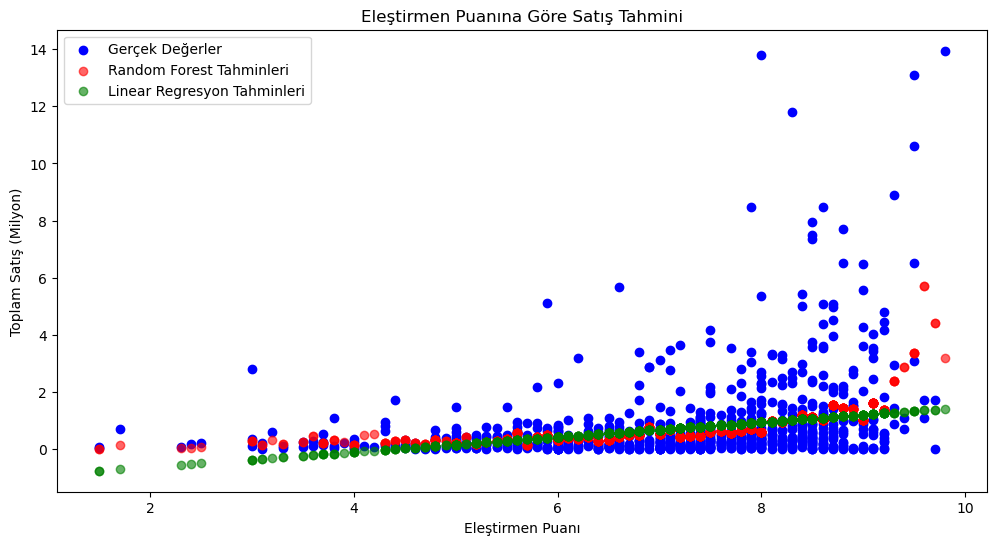

Random Forest R^2 Skoru: 0.1384454610346847
Random Forest Hata Kareleri Ortalaması: 2.0491434738034138
Linear Regresyon R^2 Skoru: 0.08585305186242997
Linear Regresyon Hata Kareleri Ortalaması: 2.1742306124033104


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['total_sales'] = pd.to_numeric(data['total_sales'], errors='coerce')

data = data.dropna(subset=['critic_score', 'total_sales'])

X = data[['critic_score']]
y = data['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modeli
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Lojistik Regresyon Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')
plt.scatter(X_test, rf_predictions, color='red', label='Random Forest Tahminleri', alpha=0.6)
plt.scatter(X_test, lr_predictions, color='green', label='Linear Regresyon Tahminleri', alpha=0.6)
plt.xlabel('Eleştirmen Puanı')
plt.ylabel('Toplam Satış (Milyon)')
plt.legend()
plt.title('Eleştirmen Puanına Göre Satış Tahmini')
plt.show()

# Model Performansları
print("Random Forest R^2 Skoru:", r2_score(y_test, rf_predictions))
print("Random Forest Hata Kareleri Ortalaması:", mean_squared_error(y_test, rf_predictions))

print("Linear Regresyon R^2 Skoru:", r2_score(y_test, lr_predictions))
print("Linear Regresyon Hata Kareleri Ortalaması:", mean_squared_error(y_test, lr_predictions))

# Bu kod ile iki farklı modelin performansını karşılaştırabilir ve satış tahmini için en iyi yaklaşımı seçebilirsin! 🚀


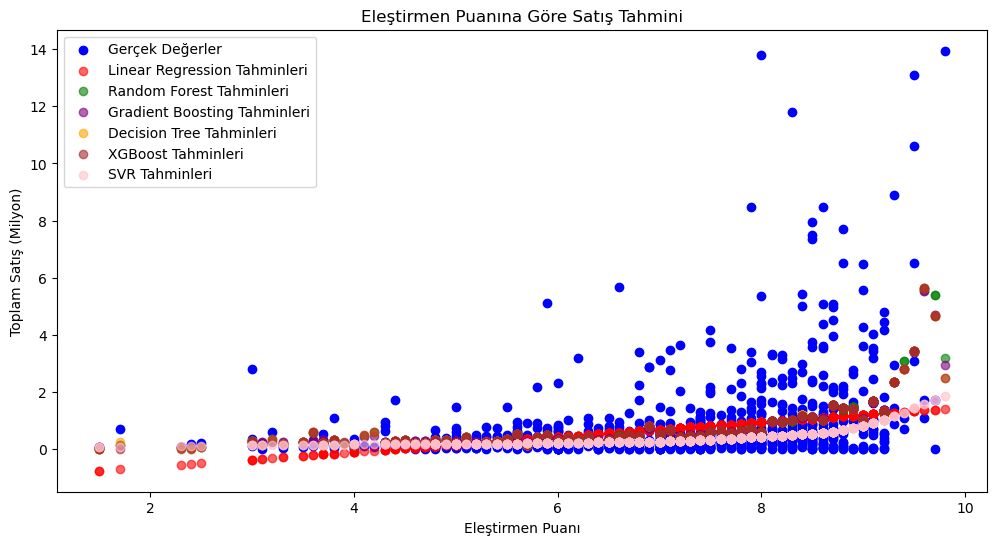

Linear Regression R^2 Skoru: 0.0859
Linear Regression Hata Kareleri Ortalaması: 2.1742

Random Forest R^2 Skoru: 0.1312
Random Forest Hata Kareleri Ortalaması: 2.0664

Gradient Boosting R^2 Skoru: 0.1371
Gradient Boosting Hata Kareleri Ortalaması: 2.0524

Decision Tree R^2 Skoru: 0.1305
Decision Tree Hata Kareleri Ortalaması: 2.0679

XGBoost R^2 Skoru: 0.1305
XGBoost Hata Kareleri Ortalaması: 2.0681

SVR R^2 Skoru: 0.0188
SVR Hata Kareleri Ortalaması: 2.3336



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi hazırlama
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['total_sales'] = pd.to_numeric(data['total_sales'], errors='coerce')
data = data.dropna(subset=['critic_score', 'total_sales'])

X = data[['critic_score']]
y = data['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "SVR": SVR()
}

# Model eğitimi ve tahminler
y_pred = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred[name] = model.predict(X_test)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')

colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink']
for (name, predictions), color in zip(y_pred.items(), colors):
    plt.scatter(X_test, predictions, color=color, label=f'{name} Tahminleri', alpha=0.6)

plt.xlabel('Eleştirmen Puanı')
plt.ylabel('Toplam Satış (Milyon)')
plt.legend()
plt.title('Eleştirmen Puanına Göre Satış Tahmini')
plt.show()

# Model Performansları
for name, predictions in y_pred.items():
    print(f"{name} R^2 Skoru: {r2_score(y_test, predictions):.4f}")
    print(f"{name} Hata Kareleri Ortalaması: {mean_squared_error(y_test, predictions):.4f}\n")


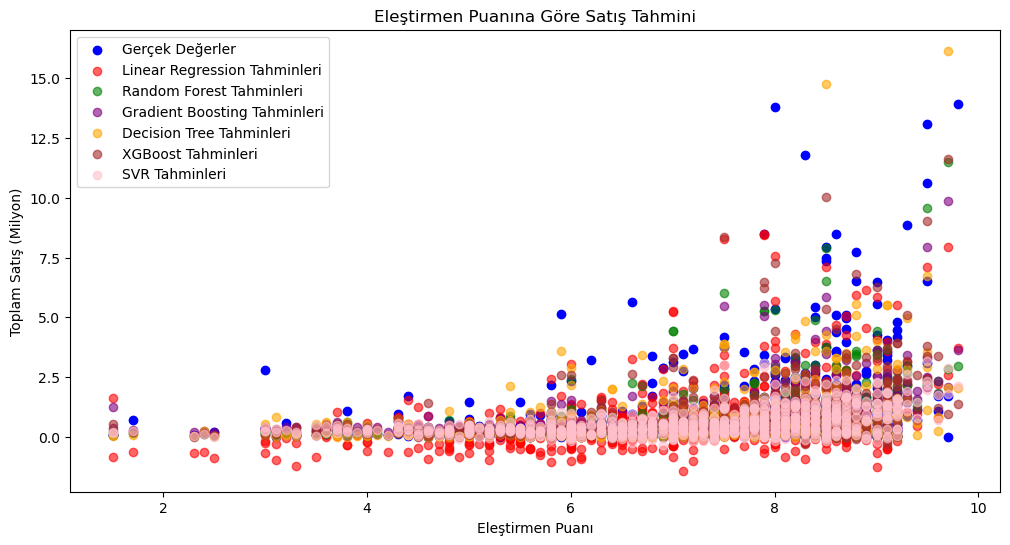

Linear Regression R^2 Skoru: 0.2698
Linear Regression Hata Kareleri Ortalaması: 1.7367

Random Forest R^2 Skoru: 0.3112
Random Forest Hata Kareleri Ortalaması: 1.6383

Gradient Boosting R^2 Skoru: 0.3713
Gradient Boosting Hata Kareleri Ortalaması: 1.4954

Decision Tree R^2 Skoru: -0.0003
Decision Tree Hata Kareleri Ortalaması: 2.3790

XGBoost R^2 Skoru: 0.2831
XGBoost Hata Kareleri Ortalaması: 1.7052

SVR R^2 Skoru: 0.3244
SVR Hata Kareleri Ortalaması: 1.6068



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi hazırlama
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['total_sales'] = pd.to_numeric(data['total_sales'], errors='coerce')
data = data.dropna(subset=['critic_score', 'total_sales', 'genre', 'release_year', 'console', 'publisher', 'developer'])

# Özellikleri belirleme
X = data[['critic_score', 'genre', 'release_year', 'console', 'publisher', 'developer']]
y = data['total_sales']

# Kategorik değişkenleri dönüştürme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['critic_score', 'release_year']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genre', 'console', 'publisher', 'developer'])
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımlama
models = {
    "Linear Regression": Pipeline([("preprocess", preprocessor), ("model", LinearRegression())]),
    "Random Forest": Pipeline([("preprocess", preprocessor), ("model", RandomForestRegressor())]),
    "Gradient Boosting": Pipeline([("preprocess", preprocessor), ("model", GradientBoostingRegressor())]),
    "Decision Tree": Pipeline([("preprocess", preprocessor), ("model", DecisionTreeRegressor())]),
    "XGBoost": Pipeline([("preprocess", preprocessor), ("model", XGBRegressor(objective='reg:squarederror'))]),
    "SVR": Pipeline([("preprocess", preprocessor), ("model", SVR())])
}

# Model eğitimi ve tahminler
y_pred = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred[name] = model.predict(X_test)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(X_test['critic_score'], y_test, color='blue', label='Gerçek Değerler')

colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink']
for (name, predictions), color in zip(y_pred.items(), colors):
    plt.scatter(X_test['critic_score'], predictions, color=color, label=f'{name} Tahminleri', alpha=0.6)

plt.xlabel('Eleştirmen Puanı')
plt.ylabel('Toplam Satış (Milyon)')
plt.legend()
plt.title('Eleştirmen Puanına Göre Satış Tahmini')
plt.show()

# Model Performansları
for name, predictions in y_pred.items():
    print(f"{name} R^2 Skoru: {r2_score(y_test, predictions):.4f}")
    print(f"{name} Hata Kareleri Ortalaması: {mean_squared_error(y_test, predictions):.4f}\n")
